# СДЗ 1



In [1]:
import time

total_times = {}

def timer(func):
    """
    Функция (декоратор) для отслеживания времени выполнения функций.
    """
    def wrapper(*args, **kwargs):
        func_name = func.__name__

        is_outermost_call = func_name not in total_times

        if is_outermost_call:
            total_times[func_name] = 0
            start_time = time.perf_counter()

        result = func(*args, **kwargs)

        if is_outermost_call:
            end_time = time.perf_counter()
            total_times[func_name] = end_time - start_time
            print(f"Функция '{func_name}' общее время: {total_times[func_name]:.6f} сек")
            del total_times[func_name]

        return result
    return wrapper

## Задача 1. Развернутая форма числа (1 балл)

Напишите функции, которы принимают целое число и возвращает его развернутую форму. Первая должна использовать списки или строки для решения, а вторая -- нет.

Оцените асимптотику обеих функций. Чем решение на списках и строках может быть хуже, чем альтернативное без них?
Реализовали ли Вы вывод очередной части разложеняи сразу после его получения или в конце программы? Как лучше и почему?

**Ввод:** `12345`  
**Вывод:** `'1 * 10^4 + 2 * 10^3 + 3 * 10^2 + 4 * 10^1 + 5 * 10^0'`

In [2]:
'''
O(n), где n - количество цифр в числе.

Чем решение на списках и строках может быть хуже:

Дополнительная память для хранения списка промежуточных результатов
Операция join() требует дополнительного прохода по списку
Преобразование числа в строку создает дополнительный объект в памяти

Я реализовал вывод в конце программы, так как это более практично и читаемо.
Вывод по частям был бы менее удобен для дальнейшего использования результата, хотя и сэкономил бы память.
'''
@timer
def formWithStrings(n):
    s = str(n)
    length = len(s)
    result = []

    for i, digit in enumerate(s):
        if digit != '0':
            power = length - i - 1
            result.append(f"{digit} * 10^{power}")

    return ' + '.join(result)

print(formWithStrings(12345))
print(formWithStrings(70304))
print(formWithStrings(9000))
print('-----')

@timer
def formWithoutWtrings(n):
    temp = n
    digits = 0
    while temp > 0:
        digits += 1
        temp //= 10

    result = ""
    power = digits - 1

    while n > 0:
        divisor = 10 ** power
        digit = n // divisor

        if digit != 0:
            if result:
                result += " + "
            result += str(digit) + " * 10^" + str(power)

        n %= divisor
        power -= 1

    return result

print(formWithoutWtrings(12345))
print(formWithoutWtrings(70304))
print(formWithoutWtrings(9000))

Функция 'formWithStrings' общее время: 0.000006 сек
1 * 10^4 + 2 * 10^3 + 3 * 10^2 + 4 * 10^1 + 5 * 10^0
Функция 'formWithStrings' общее время: 0.000002 сек
7 * 10^4 + 3 * 10^2 + 4 * 10^0
Функция 'formWithStrings' общее время: 0.000001 сек
9 * 10^3
-----
Функция 'formWithoutWtrings' общее время: 0.000007 сек
1 * 10^4 + 2 * 10^3 + 3 * 10^2 + 4 * 10^1 + 5 * 10^0
Функция 'formWithoutWtrings' общее время: 0.000002 сек
7 * 10^4 + 3 * 10^2 + 4 * 10^0
Функция 'formWithoutWtrings' общее время: 0.000001 сек
9 * 10^3


## Задача 2. Возведение в степень (1 балл)

Реализуйте возведение в степень. Напишите рекурсивный алгоритм и итерационный.
Какие проблемы у рекурсивного алгоритма?




In [3]:
@timer
def powerRecursive(base, exp):
    if exp == 0:
        return 1
    if exp == 1:
        return base

    if exp % 2 == 0:
        half = powerRecursive(base, exp // 2)
        return half * half
    else:
        return base * powerRecursive(base, exp - 1)

print("2^10 =", powerRecursive(2, 10))
print("3^5 =", powerRecursive(3, 5))
print("5^0 =", powerRecursive(5, 0))
print("-----")

@timer
def powerIterative(base, exp):
    result = 1
    current_power = base

    while exp > 0:
        if exp % 2 == 1:
            result *= current_power
        current_power *= current_power
        exp //= 2

    return result

print("2^10 =", powerIterative(2, 10))
print("3^5 =", powerIterative(3, 5))
print("5^0 =", powerIterative(5, 0))

Функция 'powerRecursive' общее время: 0.000003 сек
2^10 = 1024
Функция 'powerRecursive' общее время: 0.000001 сек
3^5 = 243
Функция 'powerRecursive' общее время: 0.000000 сек
5^0 = 1
-----
Функция 'powerIterative' общее время: 0.000001 сек
2^10 = 1024
Функция 'powerIterative' общее время: 0.000001 сек
3^5 = 243
Функция 'powerIterative' общее время: 0.000000 сек
5^0 = 1


Проблемы рекурсивного алгоритма

    Переполнение стека вызовов - для больших степеней рекурсия может исчерпать доступную память стека
    Дополнительные накладные расходы - каждый вызов функции требует сохранения контекста
    Ограничение глубины рекурсии - в Python есть ограничение на глубину рекурсии (обычно около 1000)

Если необходимо использовать рекурсивный алгоритм для больших значений, можно увеличить лимит рекурсии
```
import sys

sys.setrecursionlimit(10000)

print("2^1000 (первые 50 цифр):", str(power_recursive(2, 1000))[:50])
```



## Задача 3. (1 балл)
Напишите модификацию алгоритма Евклида для четных чисел, который обсуждался на семинаре 2.

Теперь оптимизируйте его с помощью побитовых операций. Замените везде, где это возможно, операции на побитовые.


In [4]:
def gcdBinary(a, b):
    if not a:
        return b
    if not b:
        return a

    shift = 0
    while ((a | b) & 1) == 0:
        a >>= 1
        b >>= 1
        shift += 1

    while (a & 1) == 0:
        a >>= 1

    while b:
        while (b & 1) == 0:
            b >>= 1

        if a > b:
            a, b = b, a

        b -= a

    return a << shift

## Задача 4. Сравнение алгоритмов Евклида (1 балл)

Напишите как можно больше различных тестов для различных реализаций (максимум 5). Среди них обязательно должны быть тесты на граничные случаи (corner-case tests).

Протестируйте оба алгоритма на них.


In [5]:
def gcdNoBinary(a, b):
    if a == 0:
        return b
    if b == 0:
        return a

    shift = 0
    while a % 2 == 0 and b % 2 == 0:
        a //= 2
        b //= 2
        shift += 1

    while a % 2 == 0:
        a //= 2

    while b != 0:
        while b % 2 == 0:
            b //= 2

        if a > b:
            a, b = b, a

        b -= a

    return a * (2 ** shift)

In [6]:
def test_gcd_algorithms():
    test_cases = [
        (48, 18, "Обычный случай"),
        (100, 50, "Одно число делится на другое"),
        (17, 19, "Взаимно простые числа"),
        (0, 5, "Один из аргументов - ноль"),
        (7, 0, "Второй аргумент - ноль"),
        (1, 100, "НОД с единицей"),
        (13, 13, "Одинаковые числа"),
        (2**10, 2**5, "Степени двойки"),
    ]

    for a, b, description in test_cases:
        binary_bit = gcdBinary(a, b) if a > 0 and b > 0 else (b if a == 0 else a)
        binary_no_bit = gcdNoBinary(a, b) if a > 0 and b > 0 else (b if a == 0 else a)

        print(f"{description}: ({a}, {b})")
        print(f"  Бинарный (побитовый): {binary_bit}")
        print(f"  Бинарный (без побитовых): {binary_no_bit}")
        print(f"  Совпадают: {"Да" if binary_bit == binary_no_bit else "Нет"}")
        print()

test_gcd_algorithms()

Обычный случай: (48, 18)
  Бинарный (побитовый): 6
  Бинарный (без побитовых): 6
  Совпадают: Да

Одно число делится на другое: (100, 50)
  Бинарный (побитовый): 50
  Бинарный (без побитовых): 50
  Совпадают: Да

Взаимно простые числа: (17, 19)
  Бинарный (побитовый): 1
  Бинарный (без побитовых): 1
  Совпадают: Да

Один из аргументов - ноль: (0, 5)
  Бинарный (побитовый): 5
  Бинарный (без побитовых): 5
  Совпадают: Да

Второй аргумент - ноль: (7, 0)
  Бинарный (побитовый): 7
  Бинарный (без побитовых): 7
  Совпадают: Да

НОД с единицей: (1, 100)
  Бинарный (побитовый): 1
  Бинарный (без побитовых): 1
  Совпадают: Да

Одинаковые числа: (13, 13)
  Бинарный (побитовый): 13
  Бинарный (без побитовых): 13
  Совпадают: Да

Степени двойки: (1024, 32)
  Бинарный (побитовый): 32
  Бинарный (без побитовых): 32
  Совпадают: Да



### Сравнение производительности

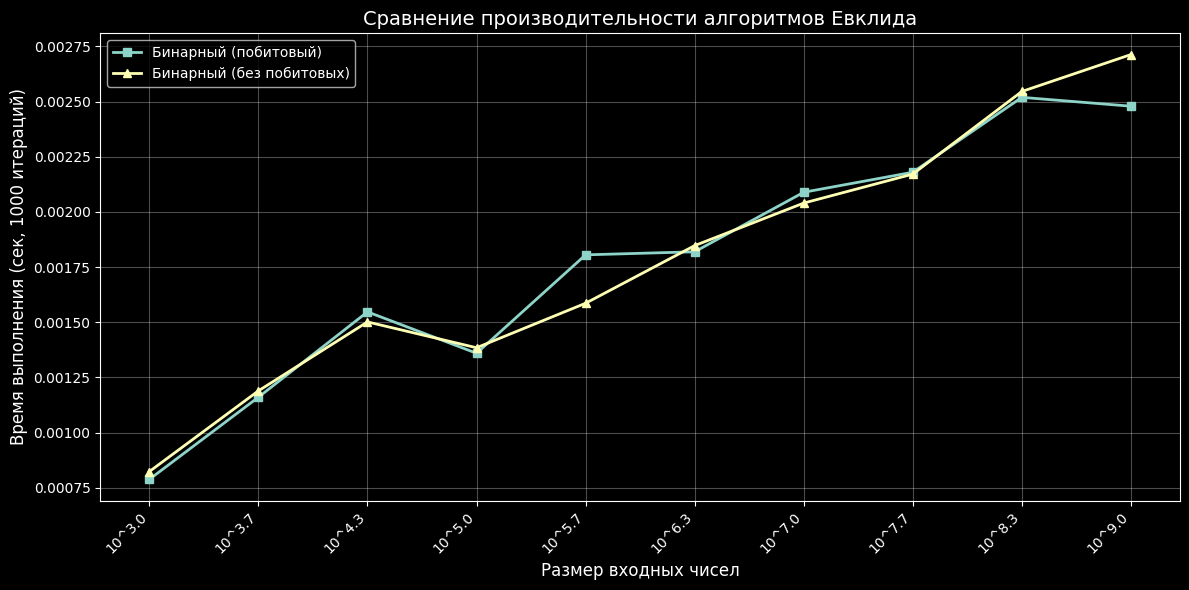

In [7]:
import time
import random
import matplotlib.pyplot as plt
import numpy as np

random.seed(42)

sizes = np.logspace(3, 9, 10, dtype=int)  # от 10^3 до 10^9
test_pairs = []
for size in sizes:
    a = random.randint(size // 2, size)
    b = random.randint(size // 2, size)
    test_pairs.append((a, b))

times_binary_bit = []
times_binary_no_bit = []

for a, b in test_pairs:
    # с
    start = time.perf_counter()
    for _ in range(1000):
        gcdBinary(a, b)
    times_binary_bit.append(time.perf_counter() - start)

    # без
    start = time.perf_counter()
    for _ in range(1000):
        gcdNoBinary(a, b)
    times_binary_no_bit.append(time.perf_counter() - start)

plt.figure(figsize=(12, 6))
x = range(len(test_pairs))
x_labels = [f"10^{np.log10(sizes[i]):.1f}" for i in range(len(test_pairs))]

plt.plot(x, times_binary_bit, marker='s', label='Бинарный (побитовый)', linewidth=2)
plt.plot(x, times_binary_no_bit, marker='^', label='Бинарный (без побитовых)', linewidth=2)

plt.xlabel('Размер входных чисел', fontsize=12)
plt.ylabel('Время выполнения (сек, 1000 итераций)', fontsize=12)
plt.title('Сравнение производительности алгоритмов Евклида', fontsize=14)
plt.xticks(x, x_labels, rotation=45, ha='right')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Выводы

Асимптотика обоих алгоритмов: O(log a · log b)

Бинарный алгоритм с побитовыми операциями может быть быстрее для очень больших чисел

Бинарный алгоритм без побитовых операций обычно медленнее из-за более затратных арифметических операций

## Задача 5. Линейное решето Эратосфена (1 балл)

Напишите линейное решето Эратосфена. Какая у него асимптотика? Обоснуйте, почему так.


In [8]:
def linearSieve(n):
    primes = []
    min_prime_factor = [0] * (n + 1)

    for i in range(2, n + 1):
        if min_prime_factor[i] == 0:
            min_prime_factor[i] = i
            primes.append(i)

        for p in primes:
            if p > min_prime_factor[i] or i * p > n:
                break
            min_prime_factor[i * p] = p

    return primes, min_prime_factor

primes_30, mpf_30 = linearSieve(30)
print("Простые числа до 30:", primes_30)

primes_100, mpf_100 = linearSieve(100)
print("\nПростые числа до 100:", primes_100)
print(f"Всего простых чисел до 100: {len(primes_100)}")

print("\nПримеры минимальных простых делителей:")
for num in [12, 15, 20, 21, 30]:
    print(f"МПД({num}) = {mpf_100[num]}")

Простые числа до 30: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

Простые числа до 100: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
Всего простых чисел до 100: 25

Примеры минимальных простых делителей:
МПД(12) = 2
МПД(15) = 3
МПД(20) = 2
МПД(21) = 3
МПД(30) = 2


Обоснование асимптотики O(n)

Линейное решето Эратосфена имеет асимптотику O(n), потому что:

    Каждое составное число вычеркивается ровно один раз - только когда мы рассматриваем его как произведение минимального простого делителя на другое число

    Ключевое условие: if p > min_prime_factor[i]: break
        Это гарантирует, что для каждого числа n = p * i мы вычеркиваем его только один раз, когда p является минимальным простым делителем n

    Общее количество операций:
        Внешний цикл: O(n) итераций
        Для каждого i мы перебираем простые числа, но благодаря условию break, каждое составное число обрабатывается ровно один раз
        Суммарное количество операций: n + (количество составных чисел) = O(n)

В отличие от классического решета Эратосфена с асимптотикой O(n log log n), линейное решето работает за строго линейное время.

## Задача 6.  (2 балла)

В этой задаче Вам требуется найти максимальную по длине подстроку данной строки, такую что каждый символ встречается в ней не более k раз.



In [9]:
from collections import defaultdict

def lengthOfLongestSubstring(s, k):
    # O(n), где n - длина строки.
    char_count = defaultdict(int)
    left = 0
    max_length = 0
    max_start = 0

    for right in range(len(s)):
        char_count[s[right]] += 1

        while char_count[s[right]] > k:
            char_count[s[left]] -= 1
            if char_count[s[left]] == 0:
                del char_count[s[left]]
            left += 1

        current_length = right - left + 1
        if current_length > max_length:
            max_length = current_length
            max_start = left

    return s[max_start:max_start + max_length], max_length

s1 = "aaabbbccc"
k1 = 2
result1, length1 = lengthOfLongestSubstring(s1, k1)
print(f"Строка: '{s1}', k={k1}")
print(f"Результат: '{result1}', длина: {length1}")
print("-----")
s2 = "abcabcabc"
k2 = 2
result2, length2 = lengthOfLongestSubstring(s2, k2)
print(f"Строка: '{s2}', k={k2}")
print(f"Результат: '{result2}', длина: {length2}")
print("----")
s3 = "aaaa"
k3 = 1
result3, length3 = lengthOfLongestSubstring(s3, k3)
print(f"Строка: '{s3}', k={k3}")
print(f"Результат: '{result3}', длина: {length3}")

Строка: 'aaabbbccc', k=2
Результат: 'aabb', длина: 4
-----
Строка: 'abcabcabc', k=2
Результат: 'abcabc', длина: 6
----
Строка: 'aaaa', k=1
Результат: 'a', длина: 1


## Задача 7.  (3 балла)

Александр недавно увлекся горным туризмом. Ему уже надоело покорять отдельные горные пики, и он собирается покорить самую настоящую горную цепь!

Напомним, что Александр живет в плоском мире. Горная цепь состоит из отрезков, соединяющих точки на плоскости, каждая из которых находится строго правее предыдущей (x-координата следующей точки больше, чем у предыдущей). Трассой на горной цепи называется её часть между двумя фиксированными концами отрезков.

Участок, на котором при движении по трассе координата y (высота) всегда возрастает, называется подъемом, величиной подъема называется разность высот между начальной и конечной точками участка.

Туристическая компания предлагает на выбор несколько трасс на одной горной цепи. Александр из-за финансовых трудностей может выбрать для поездки только одну из этих трасс. Вы решили помочь ему с выбором. Александру важно для каждой трассы определить суммарную высоту подъемов на ней. Обратите внимание, что трасса может идти как слева-направо, так и справа-налево.

В первой строке входного файла содержится единственное число N — количество точек ломаной, задающей горную цепь (1 ≤ N ≤ 30 000). Далее в N строках содержатся описания точек, каждое из которых состоит из двух целых чисел,
x_i
  и
y_i  
​
    (1 ≤
x_i
​
 ,
y_i
​
  ≤ 30 000).

В следующей строке находится число M — количество трасс (1 ≤ M ≤ 30 000).

Далее в M строках содержатся описания трасс. Каждое описание представляет собой два целых числа,
s_i
  и
f_i
​
 , они обозначают номера вершин начала и конца трассы, соответственно (1 ≤
s_i
​
  ≤ N, 1 ≤
f_i
​
  ≤ N). Начало и конец трассы могут совпадать.

Гарантируется, что во входном файле задана именно горная цепь.

Какая асимптотика должна быть у решения, чтобы оно проходило тесты с указанными ограничениями? Напишите ее и решение задачи

In [10]:
"""
При N ≤ 30,000 и M ≤ 30,000:
Решение O(N·M) может быть слишком медленным
Требуемая асимптотика - обработка данных за линейное время

Нужно сделать предподсчет за O(N) - для каждой точки вычисляем префиксную сумму подъемов
"""
def mountainChain(points, routes):
    """
    points: список кортежей (x, y)
    routes: список кортежей (start, end) - индексы вершин (1-based)
    """
    n = len(points)

    prefix_ascent = [0] * n
    for i in range(1, n):
        height_diff = points[i][1] - points[i-1][1]
        prefix_ascent[i] = prefix_ascent[i-1] + max(0, height_diff)

    prefix_ascent_reverse = [0] * n
    for i in range(n-2, -1, -1):
        height_diff = points[i][1] - points[i+1][1]
        prefix_ascent_reverse[i] = prefix_ascent_reverse[i+1] + max(0, height_diff)

    results = []
    for start, end in routes:
        start -= 1
        end -= 1

        if start <= end:
            total_ascent = prefix_ascent[end] - prefix_ascent[start]
        else:
            total_ascent = prefix_ascent_reverse[end] - prefix_ascent_reverse[start]

        results.append(total_ascent)

    return results

points1 = [(1, 1), (3, 2), (5, 4), (7, 3), (9, 5)]
routes1 = [(1, 5), (5, 1), (2, 4), (3, 3)]
results1 = mountainChain(points1, routes1)
print("Точки:", points1)
print("Маршруты:", routes1)
print("Суммарные подъемы:", results1)
print("-----")
points2 = [(1, 5), (2, 3), (4, 7), (6, 2), (8, 6)]
routes2 = [(1, 3), (3, 5), (5, 1)]
results2 = mountainChain(points2, routes2)
print("Точки:", points2)
print("Маршруты:", routes2)
print("Суммарные подъемы:", results2)

Точки: [(1, 1), (3, 2), (5, 4), (7, 3), (9, 5)]
Маршруты: [(1, 5), (5, 1), (2, 4), (3, 3)]
Суммарные подъемы: [5, 1, 2, 0]
-----
Точки: [(1, 5), (2, 3), (4, 7), (6, 2), (8, 6)]
Маршруты: [(1, 3), (3, 5), (5, 1)]
Суммарные подъемы: [4, 4, 7]


## Задача 8.  (По 1.5 балла за решение)

Дан список размера n, состоящий из неотрицательных целых чисел, где каждый элемент представляет высоту возвышения на карте высот, а ширина каждого возвышения равна 1. Определите общее количество воды, которое может быть удержано между ними после дождя.

Решите задачу тремя или более решениями. Решения различаются, если используют разные алгоритмы. Асимптотика решения должна быть лучше O(n^2).

In [11]:
def waterStack(height):
    stack = []
    water = 0

    for i in range(len(height)):
        while stack and height[i] > height[stack[-1]]:
            top = stack.pop()

            if not stack:
                break

            distance = i - stack[-1] - 1

            bounded_height = min(height[i], height[stack[-1]]) - height[top]

            water += distance * bounded_height

        stack.append(i)

    return water

test1 = [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
print(f"Вода: {waterStack(test1)}")
print("---")
test2 = [4, 2, 0, 3, 2, 5]
print(f"Вода: {waterStack(test2)}")

Вода: 6
---
Вода: 9


In [12]:
def waterPointers(height):
    if not height:
        return 0

    left, right = 0, len(height) - 1
    left_max, right_max = 0, 0
    water = 0

    while left < right:
        if height[left] < height[right]:
            if height[left] >= left_max:
                left_max = height[left]
            else:
                water += left_max - height[left]
            left += 1
        else:
            if height[right] >= right_max:
                right_max = height[right]
            else:
                water += right_max - height[right]
            right -= 1

    return water

test1 = [0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1]
print(f"Вода: {waterPointers(test1)}")
print("---")
test2 = [4, 2, 0, 3, 2, 5]
print(f"Вода: {waterPointers(test2)}")

Вода: 6
---
Вода: 9


## Задача 9. (3 балла)

Расшифровка письменности Майя оказалась более сложной задачей, чем предполагалось ранними исследованиями. На протяжении более чем двух сотен лет удалось узнать не так уж много. Основные результаты были получены за последние 30 лет.

Письменность Майя основывается на маленьких рисунках, известных как значки, которые обозначают звуки. Слова языка Майя обычно записываются с помощью этих значков, которые располагаются рядом друг с другом в некотором порядке.

Одна из проблем расшифровки письменности Майя заключается в определении этого порядка. Рисуя значки некоторого слова, писатели Майя иногда выбирали позиции для значков, исходя скорее из эстетических взглядов, а не определенных правил. Это привело к тому, что, хотя звуки для многих значков известны, археологи не всегда уверены, как должно произноситься записанное слово.

Археологи ищут некоторое слово W. Они знают значки для него, но не знают все возможные способы их расположения. Они дадут Вам g значков, составляющих слово W, и последовательность S всех значков в надписи, которую они изучают, в порядке их появления. Помогите им, подсчитав количество возможных появлений слова W.

Задание Напишите программу, которая по значкам слова W и по последовательности S значков надписи подсчитывает количество всех возможных вхождений слова W в S, то есть количество всех различных позиций идущих подряд g значков в последовательности S, которые являются какой-либо перестановкой значков слова W.

1 ≤ g ≤ 3 000, g – количество значков в слове W

g ≤ |S| ≤ 3 000 000 где |S| – количество значков в последовательности S

На вход программы поступают данные в следующем формате:

СТРОКА 1: Содержит два числа, разделенных пробелом – g и |S|.\
 СТРОКА 2: Содержит g последовательных символов, с помощью которых записывается слово W . Допустимы символы: ‘a’-‘z’ и ‘A’-‘Z’; большие и маленькие буквы считаются различными.\
  СТРОКА 3: Содержит |S| последовательных символов, которые представляют значки в надписи. Допустимы символы: ‘a’-‘z’ и ‘A’-‘Z’; большие и маленькие буквы считаются различными.

Какая асимптотика должна быть у решения, чтобы оно проходило тесты с указанными ограничениями? Напишите ее и решение задачи

In [13]:
"""
При g ≤ 3,000 и |S| ≤ 3,000,000:
Решение O(|S| · g · g!) не подойдет
Требуемая асимптотика - O(|S| · g) или O(|S| · alphabet_size) или O(|S| + g)

Нужно использовать сколзящее окно с хеш-таблицей для подчета символов
"""
from collections import Counter

def mayanWords(g, word, s):
    if g > len(s):
        return 0

    word_count = Counter(word)

    window_count = Counter(s[:g])

    result = 1 if window_count == word_count else 0

    for i in range(g, len(s)):
        window_count[s[i]] += 1

        left_char = s[i - g]
        window_count[left_char] -= 1
        if window_count[left_char] == 0:
            del window_count[left_char]

        if window_count == word_count:
            result += 1

    return result

g1, word1, s1 = 3, "abc", "abccbaabccab"
print(f"g={g1}, word='{word1}', s='{s1}'")
print(f"Количество вхождений: {mayanWords(g1, word1, s1)}")
print("-----")
g2, word2, s2 = 2, "ab", "aabbabba"
print(f"g={g2}, word='{word2}', s='{s2}'")
print(f"Количество вхождений: {mayanWords(g2, word2, s2)}")
print("-----")
g3, word3, s3 = 4, "aabc", "aaabcbacaacb"
print(f"g={g3}, word='{word3}', s='{s3}'")
print(f"Количество вхождений: {mayanWords(g3, word3, s3)}")

g=3, word='abc', s='abccbaabccab'
Количество вхождений: 4
-----
g=2, word='ab', s='aabbabba'
Количество вхождений: 4
-----
g=4, word='aabc', s='aaabcbacaacb'
Количество вхождений: 3


## Задача 10. (3 балла)

Рассмотрим последовательность целых чисел длины
n. По ней с шагом 1 двигается «окно» длины
k, то есть сначала в «окне» видны первые
k чисел, на следующем шаге в «окне» уже будут находиться
k чисел, начиная со второго, и так далее до конца последовательности. Требуется для каждого положения «окна» определить минимум в нём.


Какая асимптотика должна быть у решения, чтобы оно проходило тесты с указанными ограничениями? Напишите ее и решение задачи

In [14]:
from collections import deque

def slidingWindowMin(arr, k):
    """
    O(n)
    """
    n = len(arr)
    dq = deque()
    result = []

    for i in range(n):
        while dq and dq[0] <= i - k:
            dq.popleft()

        while dq and arr[dq[-1]] >= arr[i]:
            dq.pop()

        dq.append(i)

        if i >= k - 1:
            result.append(arr[dq[0]])

    return result


tests = [
    ([1, 3, -1, -3, 5, 3, 6, 7], 3, [-1, -3, -3, -3, 3, 3]),
    ([1, 2, 3, 4, 5], 2, [1, 2, 3, 4]),
    ([5, 4, 3, 2, 1], 3, [3, 2, 1]),
    ([1], 1, [1]),
    ([7, 2, 4], 2, [2, 2]),
]

for i, (arr, k, expected) in enumerate(tests, 1):
    result = slidingWindowMin(arr, k)
    status = "Ок" if result == expected else "Не ок"
    print(f"Тест {i}: {status}")

Тест 1: Ок
Тест 2: Ок
Тест 3: Ок
Тест 4: Ок
Тест 5: Ок


## Задача 11. (3 балла)

Дана двоичная матрица размером n x m, заполненная нулями и единицами. Найдите наибольший прямоугольник, содержащий только единицы, и верните его площадь.


In [15]:
def largestRectangleHistogram(heights):
    stack = []
    max_area = 0

    for i in range(len(heights)):
        while stack and heights[stack[-1]] > heights[i]:
            h_idx = stack.pop()
            h = heights[h_idx]
            w = i if not stack else i - stack[-1] - 1
            max_area = max(max_area, h * w)
        stack.append(i)

    while stack:
        h_idx = stack.pop()
        h = heights[h_idx]
        w = len(heights) if not stack else len(heights) - stack[-1] - 1
        max_area = max(max_area, h * w)

    return max_area


def maximalRectangle(matrix):
    if not matrix or not matrix[0]:
        return 0

    m = len(matrix[0])
    heights = [0] * m
    max_area = 0

    for row in matrix:
        for j in range(m):
            if row[j] == 1:
                heights[j] += 1
            else:
                heights[j] = 0

        max_area = max(max_area, largestRectangleHistogram(heights))

    return max_area

tests = [
    ([[1, 0, 1, 0, 0],
      [1, 0, 1, 1, 1],
      [1, 1, 1, 1, 1],
      [1, 0, 0, 1, 0]], 6),
    ([[0]], 0),
    ([[1]], 1),
    ([[1, 1, 1, 1]], 4),
    ([[1], [1], [1], [1]], 4),
    ([[1, 1], [1, 1]], 4),
]

for i, (matrix, expected) in enumerate(tests, 1):
    result = maximalRectangle(matrix)
    status = "Ок" if result == expected else "Не ок"
    print(f"Тест {i}: {status}")

Тест 1: Ок
Тест 2: Ок
Тест 3: Ок
Тест 4: Ок
Тест 5: Ок
Тест 6: Ок


## Задача 12. (по 1 баллу за решение)

Реализуйте поиск минимума в окне фиксированного размера двумя способами.

Оба решения из структур данных кроме списков должны использовать только стэки. Поиск минмиума должен работать за O(n).